This is the new file for deep learning

<font color ='red'><h4><b>Fashion classification / Tensorflow and Keras</h4><font>

In [4]:
import tensorflow as tf

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [6]:
from tensorflow import keras

In [7]:
from tensorflow.keras.preprocessing.image import load_img

./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg


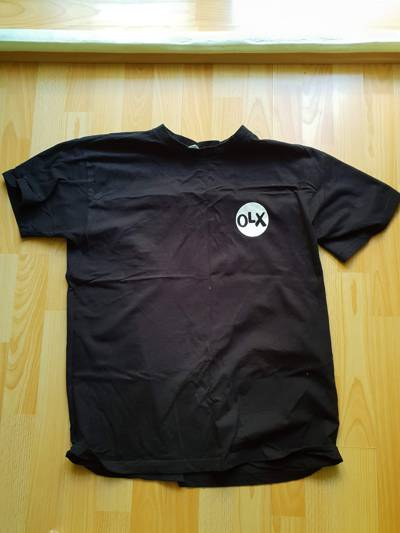

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
print(fullname)
load_img(fullname)

In [8]:
img = load_img(fullname,target_size=(299,299))

In [9]:
print(img)  # PIL is python image library

<PIL.Image.Image image mode=RGB size=299x299 at 0x174DBCE0550>


In [10]:
# converting the image to numpy array
np.array(img) # RGB value of pixels 

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [11]:
x = np.array(img)
x.shape # as in the the image is 299 pixels wide and 299 pixels long with 3 channels r,g,b

(299, 299, 3)

In the next session we will see that how to use pre-trained neural networks to see what is in this image

<font color ='red'><h4><b>Pre-trained Convolutional Neural Network</h4><font> <br>

Imagenet dataset: https://www.image-net.org/
Pre-trained models: https://keras.io/api/applications/

In [9]:
# keras application has a lot of pre-trained models that we can use to classify images. These models are trained on the imagenet dataset.
#These models have different architectures and complexity levels based on how the layers are connected and how many layers are there in the model.
#Regarding the model we have information like what is the accuracy, how fast it is, how much memory it takes, how many parameters it has, etc.
# we usually choose Xception model as it is a good tradeoff between accuracy and speed.

from tensorflow.keras.applications.xception import Xception

In [13]:
model = Xception(weights = 'imagenet',input_shape = (299,299,3)) #weights imganet signifies that we are using the pre-trained model on imagenet dataset

#at the first time we run this code, it will download the weights of the model from the internet and store it in the cache directory of the keras.

In [14]:
# model.predict(x) # this will give an error as the model expects the input to be in the form of batch i.e it expects multiple images. So we need to add an extra dimension to the input. that indicated the number of images.

X=np.array([x]) # we are adding an extra dimension to the input. so we can give multiple image as input like X=np.array([x1,x2,x3,x4,x5])
X.shape


(1, 299, 299, 3)

In [15]:
# for example 
Y=np.array([x,x,x,x,x]) # in this case we are giving 5 images as input hence the extra dimension will have value 5
Y.shape

(5, 299, 299, 3)

In [16]:
model.predict(X) # this will give the output of the model. The output is the probability of the image belonging to each of the 1000 classes in the imagenet dataset.
# currently the output will not make sense so we need to do some preprocessing to get the output in a human readable format.

1/1 [==============================] - 1s 978ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [10]:
# we can see the output is mostly 0 or tiny since this model expects the data to be in a certain format. The model expects the input to be in the range of -1 to 1.
# hence to preprocess we import a function called preprocess_input from the keras.applications.xception module.

from tensorflow.keras.applications.xception import preprocess_input

In [18]:
X = preprocess_input(X) # this will preprocess the input data so that the model can understand it.

In [19]:
X[0] # now if we take a look at the numbers they are in the range of -1 to 1 that is needed by the model. they are not in the range of 0-255

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [20]:
# now lets take a look at the output of the model
model.predict(X) # this will give the output of the model in the form of probabilities. The output is the probability of the image belonging to each of the 1000 classes in the imagenet dataset.
#and now we can see that the output is not all 0 or tiny values. The output is in the form of probabilities. The sum of all the probabilities is 1. The model is predicting that the image belongs to the class with the highest probability.

1/1 [==============================] - 1s 978ms/step


array([[3.23712331e-04, 1.57383925e-04, 2.13493113e-04, 1.52370587e-04,
        2.47626333e-04, 3.05036316e-04, 3.20592429e-04, 1.47499377e-04,
        2.03621952e-04, 1.49272513e-04, 1.95663190e-04, 2.10137499e-04,
        7.59265386e-05, 1.13972274e-04, 1.62683617e-04, 2.04638738e-04,
        1.97416259e-04, 1.44288817e-04, 1.40217569e-04, 1.73686058e-04,
        7.46690726e-04, 2.56967032e-04, 2.66809016e-04, 2.96514540e-04,
        3.73602728e-04, 2.77404411e-04, 2.16571163e-04, 2.27270240e-04,
        3.80813348e-04, 1.72166052e-04, 3.05401045e-04, 1.96431443e-04,
        3.92115384e-04, 4.78071917e-04, 2.91751610e-04, 3.25693516e-04,
        1.47395331e-04, 1.62362165e-04, 2.12710875e-04, 1.34028465e-04,
        2.40070513e-04, 6.75212534e-04, 2.54943705e-04, 1.44478850e-04,
        4.12821566e-04, 2.04408760e-04, 3.02958506e-04, 1.49339714e-04,
        1.99653834e-04, 2.27005963e-04, 2.93729594e-04, 2.27444791e-04,
        6.37644727e-04, 7.82616262e-04, 2.49557430e-04, 4.052708

In [21]:
pred = model.predict(X)

1/1 [==============================] - 0s 203ms/step


In [22]:
pred.shape # the output is in the form of a 2D array with 1 row and 1000 columns. The 1000 columns represent the 1000 classes in the imagenet dataset.

(1, 1000)

In [11]:
# now to make sense of the output we need to decode the output. We can use the decode_predictions function from the keras.applications.xception module to decode the output. as we need to know what are the classes that the model is predicting.
from tensorflow.keras.applications.xception import decode_predictions # this makes the predictions human readable

In [24]:
decode_predictions(pred) # this will give the output in a human readable format. The output is a list of tuples. Each tuple contains the class id, the class name, and the probability of the image belonging to that class.

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.68196297),
  ('n02916936', 'bulletproof_vest', 0.038140018),
  ('n04370456', 'sweatshirt', 0.03432482),
  ('n03710637', 'maillot', 0.011354224),
  ('n04525038', 'velvet', 0.0018453615)]]

In [25]:
#it is close but the problem is the model does not has any tshirt class. you can check that by clicking on the json link above. The model has a class called jersey which is similar to a tshirt. The model is predicting that the image belongs to the jersey class with a probability of 0.99.


Now this means that we need to train a different model. that has classes that we need for our particular case. The good news is that we do not have to retrain the model from scratch, we can build on the top of this only

In the next session we will see that how neural networks works under the hood and after that we can see the transfer learning and adjust the model as per our need.

<font color ='red'><h4><b>Convolutional Neural Network</h4></font> (Under the hood)

1. Types of Layers : Convolutional and dense
2. Convolutional Layers and filters
3. Dense Layers



in a  convolutional neural network, the first few layers are responsible for detecting simple patterns like edges, lines, and curves. The middle layers are responsible for detecting more complex patterns like shapes and textures. The last few layers are responsible for detecting the entire object in the image. The last layer is responsible for predicting the class of the object in the image.
the Convolutional layers contains simple filters in the first layer and some complex in the middle layer. so the filters slide through the image and detect the patterns in the image. The filters are learned by the model during the training process. The filters are learned in such a way that they can detect the patterns in the image that are important for the classification task.
the output of each filter is a feature map. The feature map is a 2D array that represents the presence of a pattern in the image. These multiple feature maps from the first layer are passed to the next layer having its own filters and producing its own feature maps. 
finally the output of the Convolutional layers is vector representation of the image. This vector representation is one dimensional array.
Now this vector is passed to the Dense layer and where each input is connected to each output. Just like in binary classification we use sigmoid here we use softmax function. The softmax function converts the output of the model into probabilities. The sum of all the probabilities is 1. The model predicts the class with the highest probability.


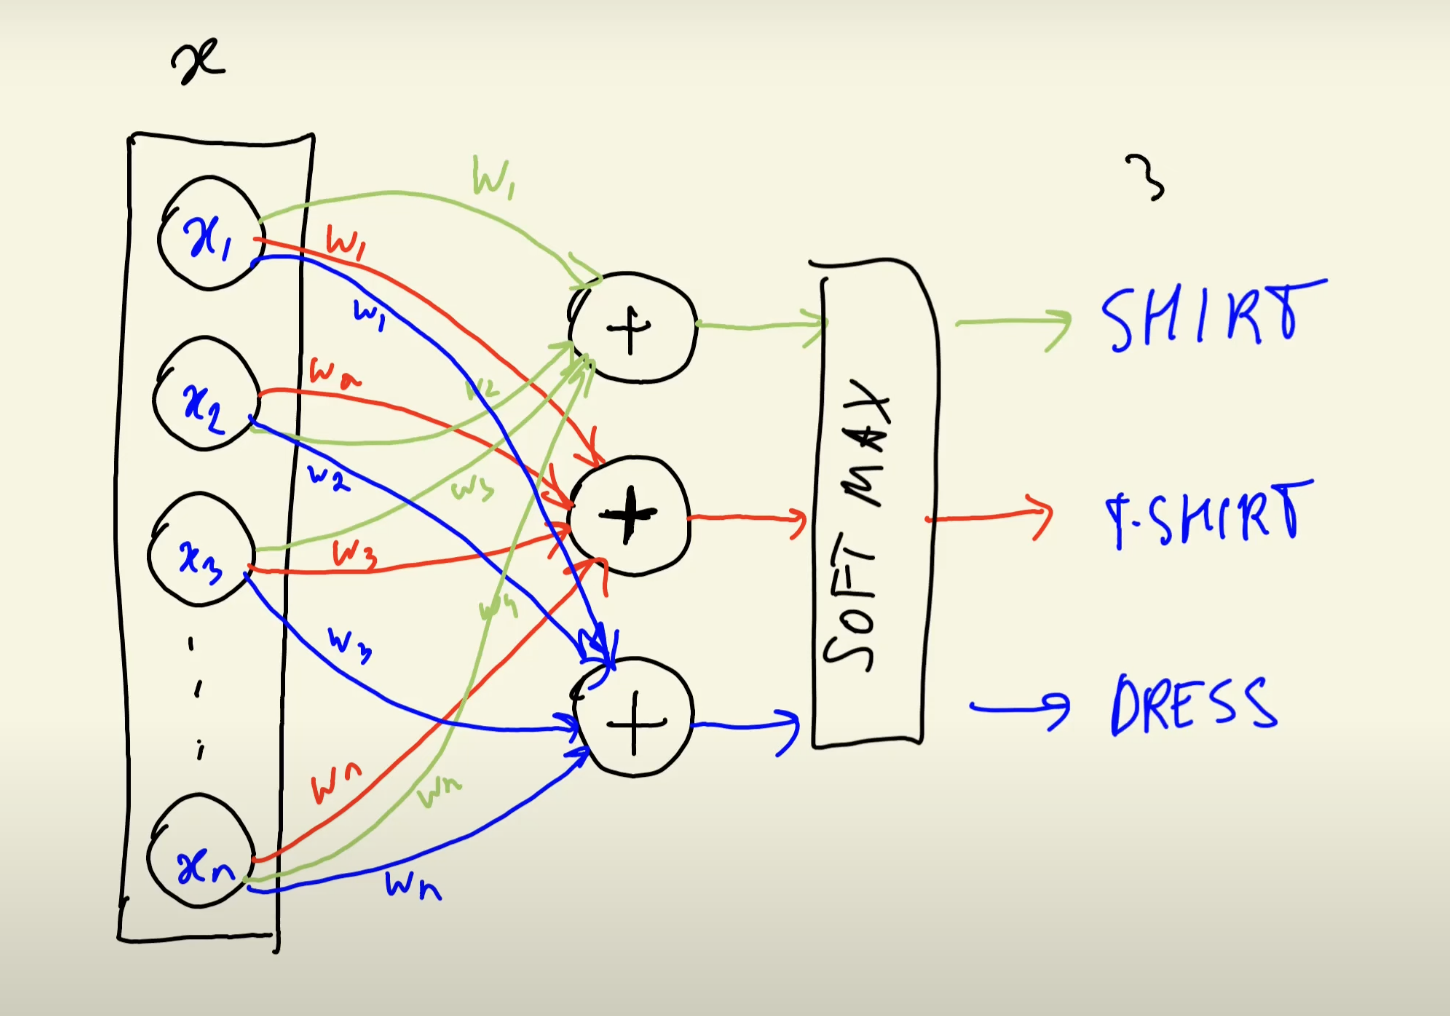 <br>

Dense Layer is nothing other then the matrix multiplication of X with W the is vector representation of the image with the wights vector of each class.<br><br>
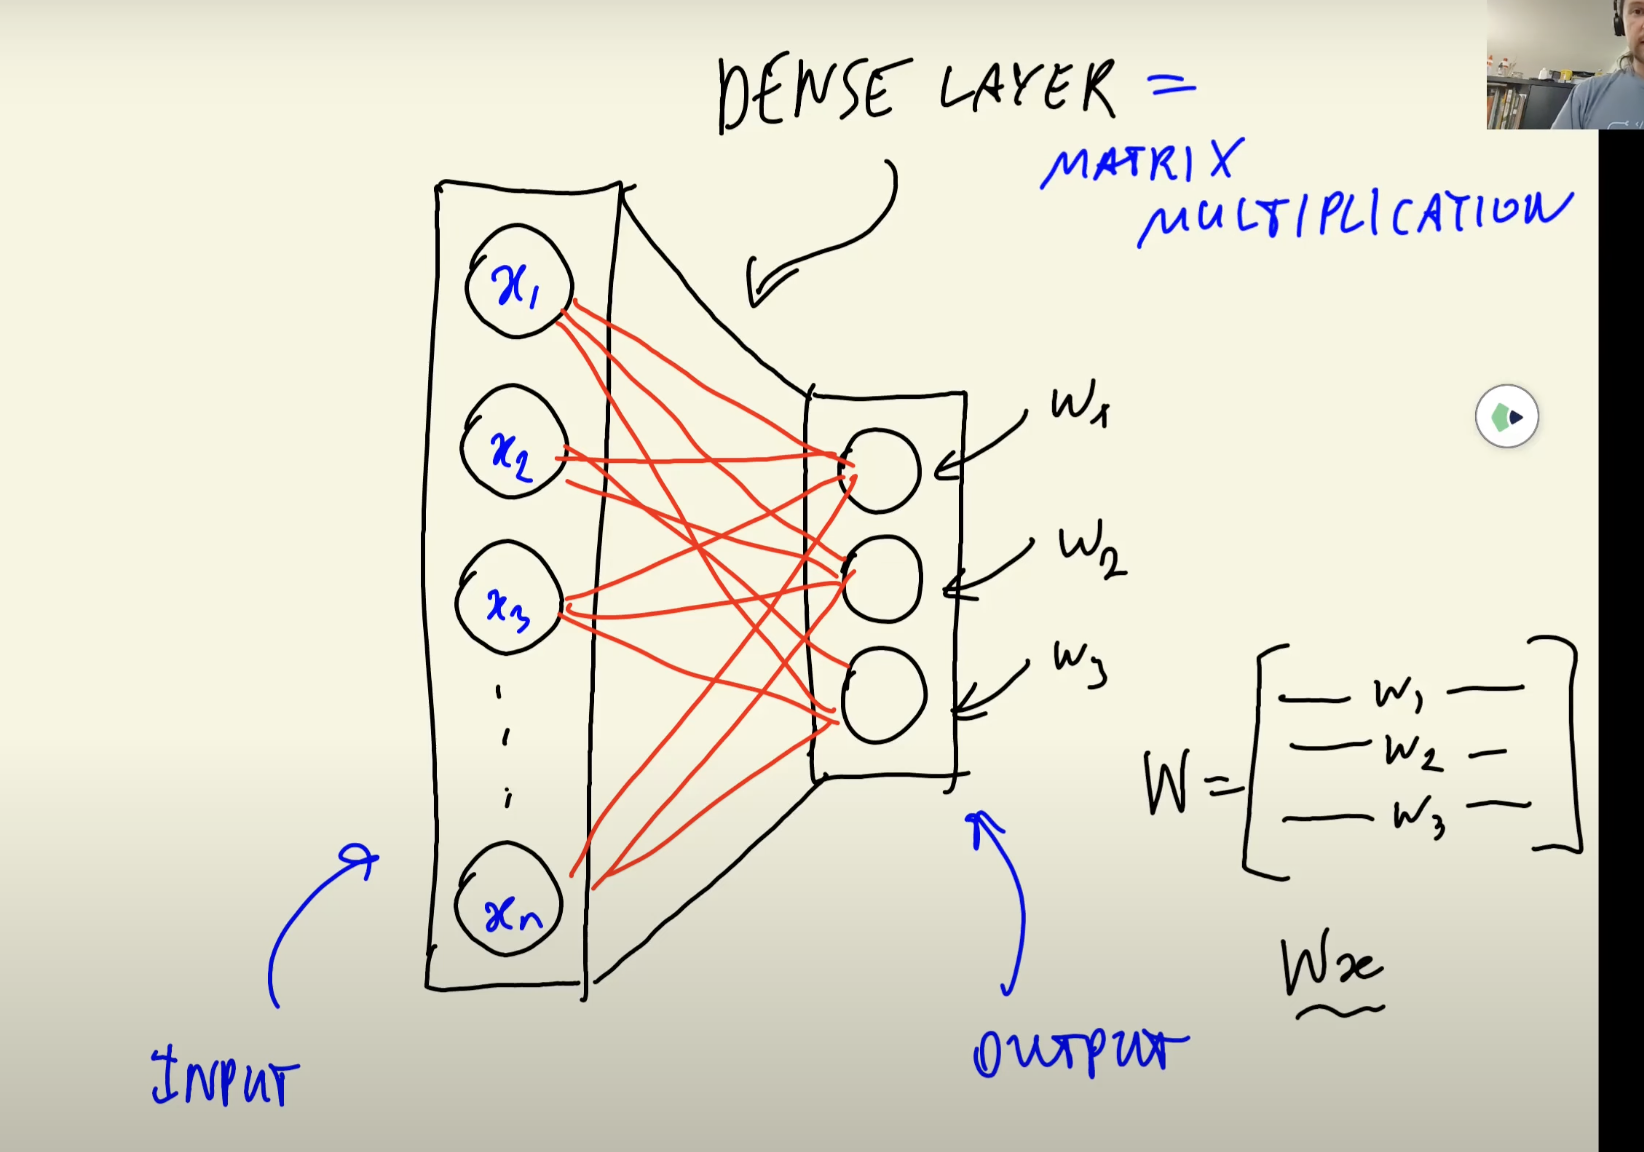 <br><br>
We can put multiple dense layers together. <br><br>
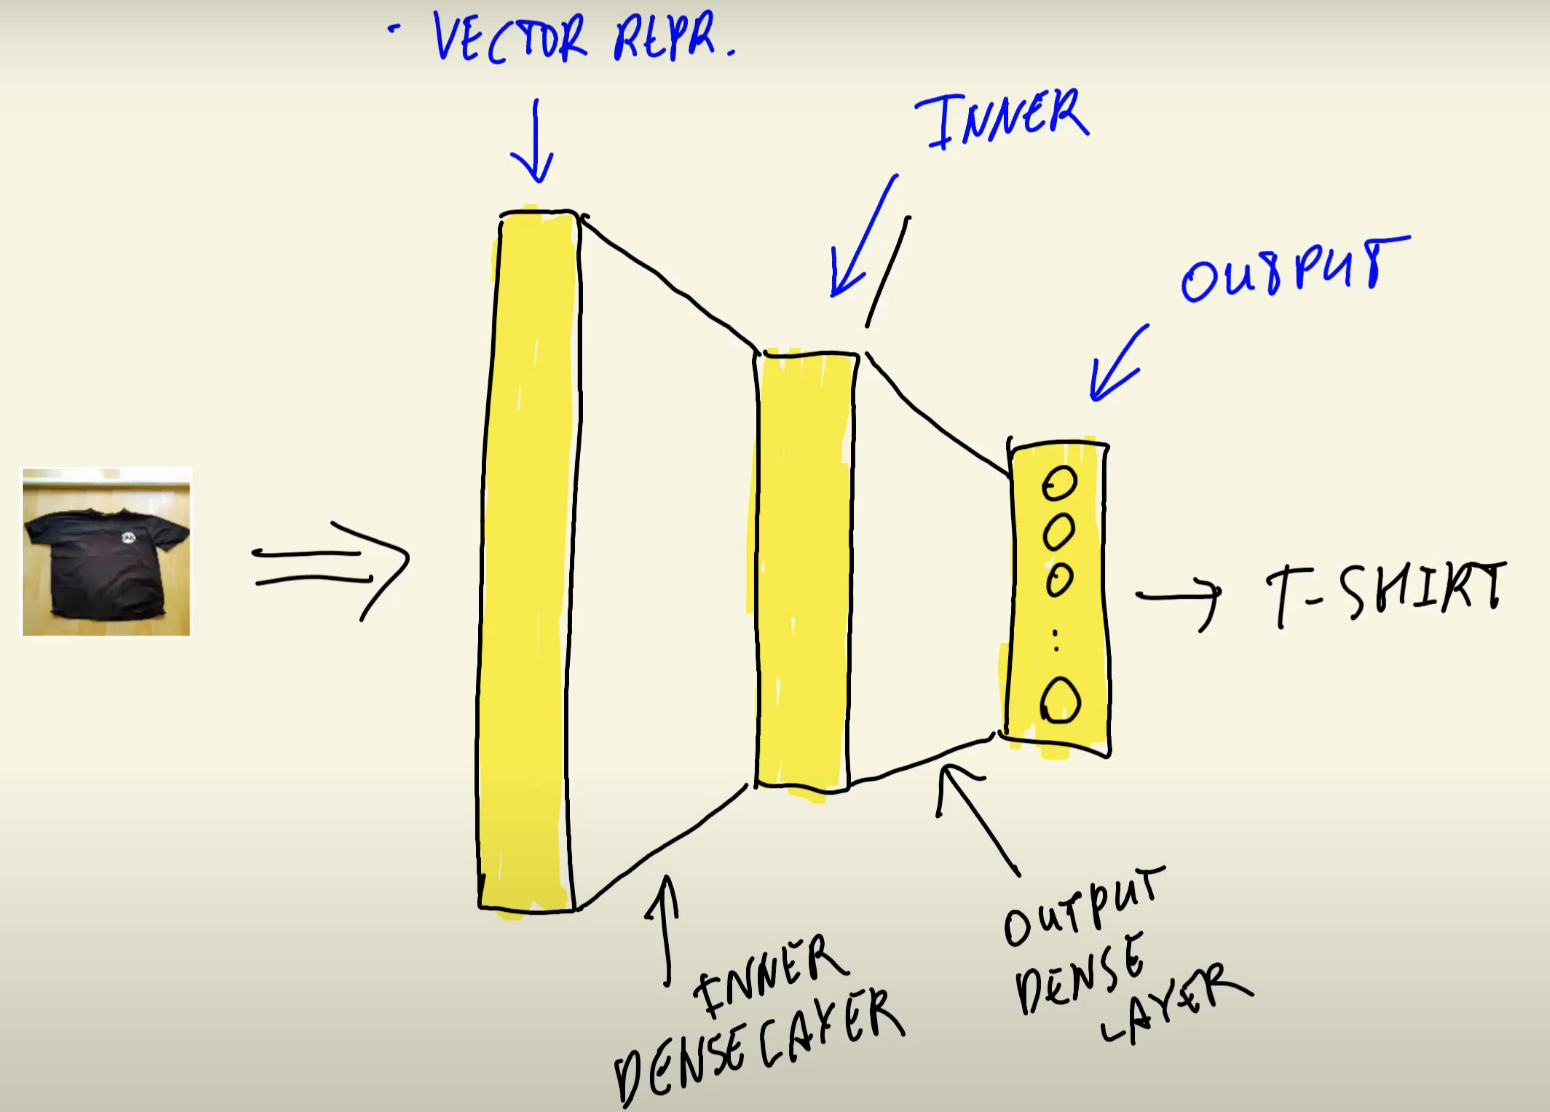<br><br>

There is also one more type of layer that is POOLING LAYER. This is used to make the feature map smaller for example the feature map is of 200*200 then it will make it of 100*100. So it will shrink it.


<font color ='red'><h4><b>Transfer Learning</h4></font>

1. Reading data with ImageDataGenerator
2. Train Xception on smaller images (150X150)




In this we will see that how can we use a pretrained model where the filters are already trained to extract the features from the images. We can use these features to train a new model on a different dataset. This is called transfer learning.
We dont need to change the convolutional layers of the model that are giving the vector representation of the image. We only need to change the dense layers that are used to classify the image. We can remove the dense layers and add our own dense layers to classify the image. Since the existing dense layers are for classfying the images as per the imagenet data classes. <br>

hence the vector representation that we have from the imagenet are useful but the dense layers are not.<br><br>
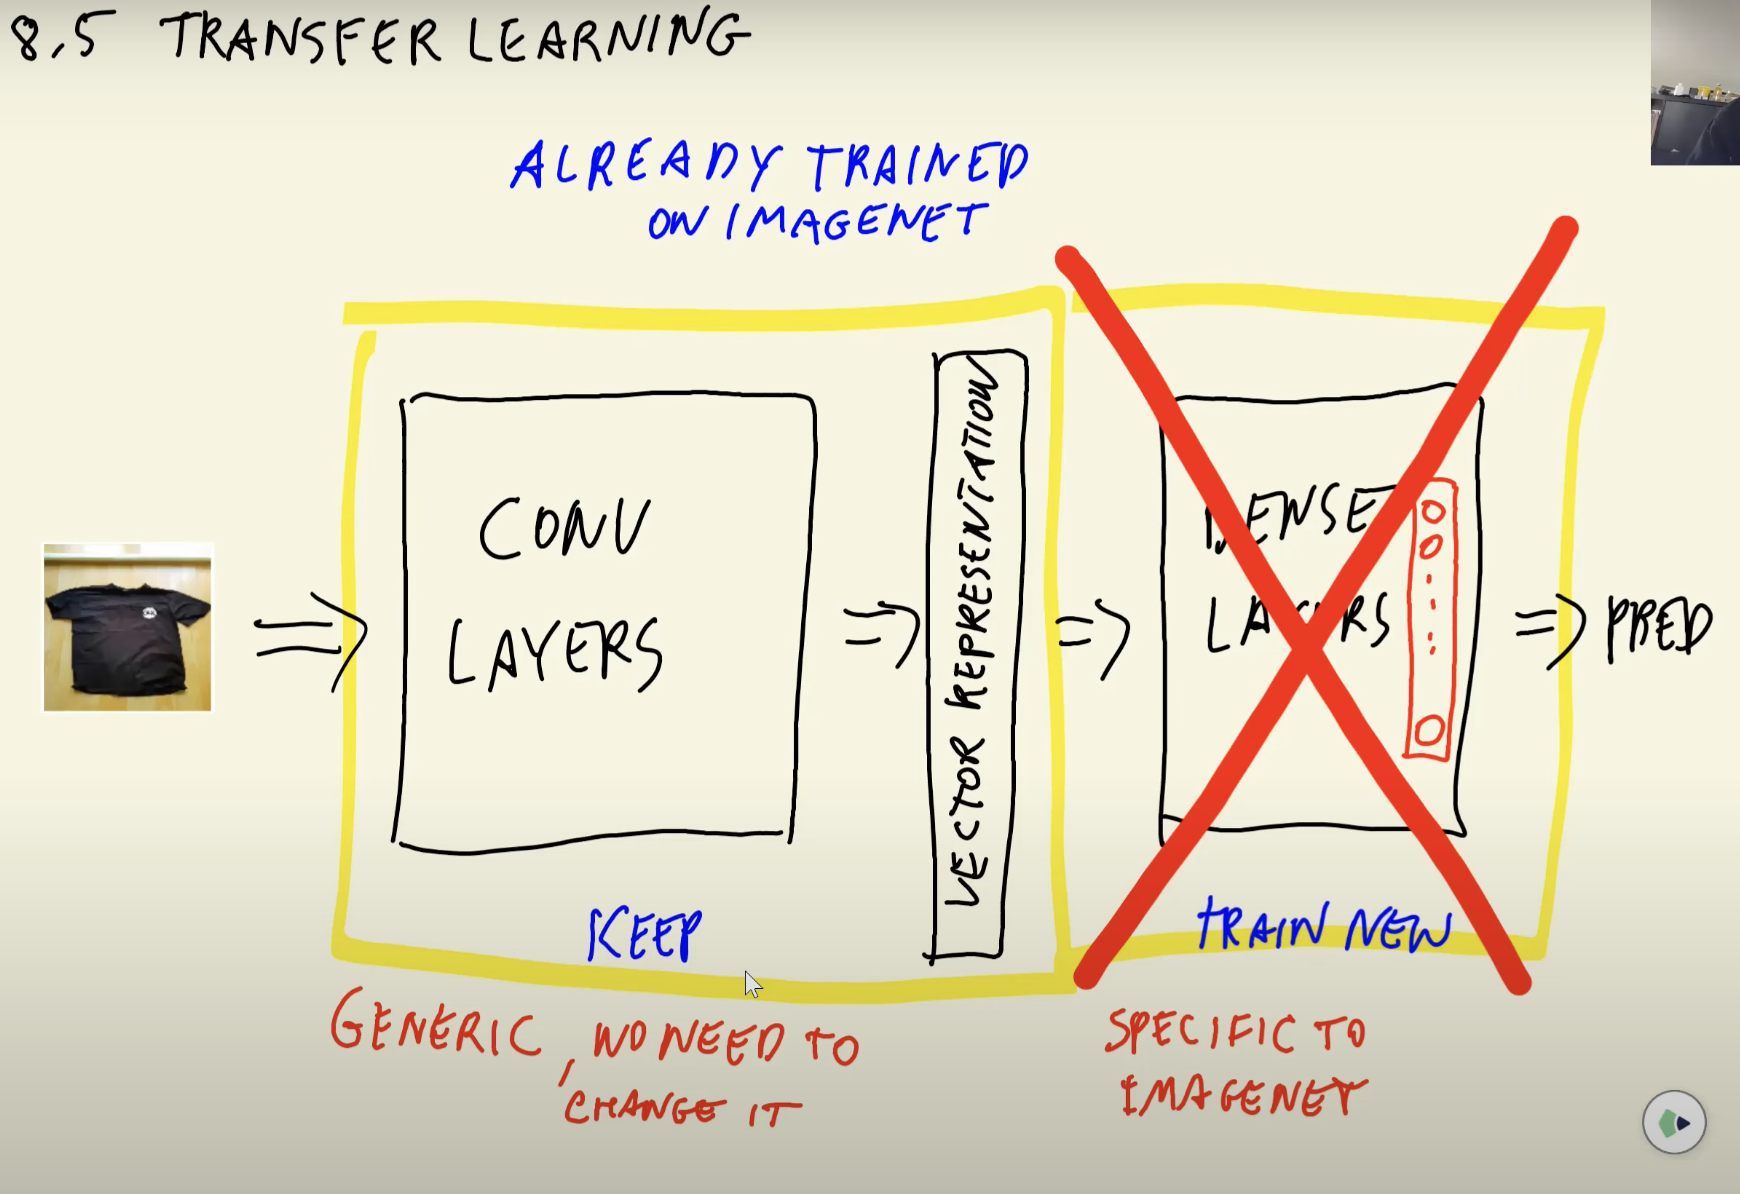 <br><br>
Now lets see how we can do this with keras



In [12]:
#The first thing to do is to read our dataset with the help of the ImageDataGenerator class. This class is used to read images from a directory and preprocess them. The class also has a method called flow_from_directory that is used to read images from a directory and preprocess them in batches. The method returns a generator object that can be used to train a model using the fit_generator method of the model class.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input) # we are using the preprocess_input function to preprocess the input data. The preprocess_input function is used to preprocess the input data so that the model can understand it.
#in the preprocessing_function we have to give the function that we want to use to preprocess the input data. In this case, we are using the preprocess_input function from the keras.applications.xception module.
#in the preprocessing_function we can also give a custom function that we have written to preprocess the input data.
#in the preprocessing_function we can also give data augmentation functions like rotation, zoom, etc. to augment the data. Data augmentation is used to increase the size of the dataset by applying transformations to the images like rotation, zoom, etc.

In [14]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',target_size=(150,150),batch_size=32) # this will return a generator object that can be used to train a model using the fit_generator method of the model class.
#the target_size parameter is used to resize the images to a fixed size. The batch_size parameter is used to specify the number of images that will be read from the directory and preprocessed in each batch.

Found 3068 images belonging to 10 classes.


In [15]:
train_ds.class_indices # this will give the class indices of the classes in the dataset. The class indices are the class names and their corresponding class ids.

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [34]:
# these classes are same as the folders in the train directory.
!ls -l clothing-dataset-small/train/

#in the above command ls is used to list the files and folders in the train directory. The -l option is used to list the files and folders in a long format. The clothing-dataset-small/train/ is the path of the train directory.

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
# then we can look in side the train_ds object to take a look what it generate

# to lad the next batch of 
# images we can use the next method of the generator object.

next(train_ds) # this will load the next batch of images from the train directory and preprocess them.

(array([[[[-0.11372548, -0.24705881, -0.45098037],
          [-0.11372548, -0.24705881, -0.45098037],
          [-0.09803921, -0.23137254, -0.4352941 ],
          ...,
          [-0.21568626, -0.372549  , -0.64705884],
          [-0.19999999, -0.372549  , -0.6784314 ],
          [-0.19999999, -0.372549  , -0.69411767]],
 
         [[-0.06666666, -0.19999999, -0.40392154],
          [-0.06666666, -0.19999999, -0.40392154],
          [-0.06666666, -0.19999999, -0.40392154],
          ...,
          [-0.21568626, -0.372549  , -0.64705884],
          [-0.19999999, -0.372549  , -0.6784314 ],
          [-0.19999999, -0.372549  , -0.69411767]],
 
         [[-0.12156862, -0.25490195, -0.4588235 ],
          [-0.09803921, -0.23137254, -0.4352941 ],
          [-0.14509803, -0.27843136, -0.4823529 ],
          ...,
          [-0.2235294 , -0.38039213, -0.654902  ],
          [-0.19215685, -0.36470586, -0.67058825],
          [-0.20784312, -0.38039213, -0.7019608 ]],
 
         ...,
 
         [[ 

In [15]:
#next(train_ds) returns two values. The first value is the input data and the second value is the output data. The input data is the images and the output data is the labels of the images. hence
X,y = next(train_ds)

In [31]:
X # so this is wht we saw earlier in loads the images and apply the preprocess_input function to the images.

array([[[[ 0.6784314 , -0.5294118 , -0.73333335],
         [ 0.6784314 , -0.5294118 , -0.73333335],
         [ 0.67058825, -0.5372549 , -0.7411765 ],
         ...,
         [ 0.37254906, -0.70980394, -0.8117647 ],
         [ 0.38823533, -0.69411767, -0.79607844],
         [ 0.36470592, -0.7176471 , -0.81960785]],

        [[ 0.67058825, -0.5372549 , -0.7411765 ],
         [ 0.67058825, -0.5372549 , -0.7411765 ],
         [ 0.6627451 , -0.54509807, -0.7490196 ],
         ...,
         [ 0.3411765 , -0.7411765 , -0.84313726],
         [ 0.3411765 , -0.7411765 , -0.84313726],
         [ 0.2941177 , -0.7882353 , -0.8901961 ]],

        [[ 0.60784316, -0.6       , -0.8039216 ],
         [ 0.6156863 , -0.5921569 , -0.79607844],
         [ 0.654902  , -0.5529412 , -0.75686276],
         ...,
         [ 0.4039216 , -0.6784314 , -0.78039217],
         [ 0.27843142, -0.8039216 , -0.90588236],
         [ 0.41960788, -0.6627451 , -0.7647059 ]],

        ...,

        [[ 0.47450984, -0.7176471 , -0

In [32]:
X.shape # this is the shape of the input data. The shape is (32,150,150,3). The first dimension is the batch size which is 32. The second and third dimensions are the height and width of the images which are 150 pixels. The fourth dimension is the number of channels which is 3.

(32, 150, 150, 3)

In [33]:
#now lets take a look at the output data as in how y looks like

y[:5]

#it has used one hot encoding to encode the labels. The one hot encoding is used to encode the labels so that the model can understand them
#xo the first one is outwear and the second one is pants and so on so this is the output of the images. so it is like combining 10 binary classification models

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# we can now do the same for validation folder

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',target_size=(150,150),batch_size=32,shuffle=False) # we are using the shuffle=False parameter to disable shuffling of the images as by default it shuffle the images for train but here its okay if the images come in the same order every time.

Found 341 images belonging to 10 classes.


In [20]:
# now lets train the model we will call in base model(from xception) in which we keep the pretrained model upto the convolutional layers and then we add our own dense layers on top of it that is custom model.activity_regularizer
base_model =Xception(weights = 'imagenet',include_top=False,input_shape=(150,150,3)) # we are using the include_top=False parameter to exclude the top layer of the model. The top layer of the model is the output layer of the model. We are excluding the top layer of the model because we are going to add our own output layer to the model. the output layer here is the dense layer

base_model.trainable=False # we are using the trainable=False parameter to freeze the weights of the base model. The trainable=False parameter is used to freeze the weights of the base model so that the weights of the base model are not updated during training. so We dont want to change the convolutional layers while training the model.


In [21]:
#now lets create a new top that is the dense layer that we will add on top of the base model
#Lets specify the inputs, that part of the model that will recieIve the images.

inputs = keras.Input(shape=(150,150,3)) # we are using the keras.Input function to specify the inputs of the model. which means that the inputs are images that are 150 pixels wide, 150 pixels long, and have 3 channels r,g,b.
# THIS INPUT GOES to our base model. and we use out base model to extract the vecctor representation and whatever is output callled base

base = base_model(inputs)

#Now we can see what everything is there in the base model using keras as we need to drop everything in the keras model

outputs = base # this will give the output of the base model. The output of the base model is the vector representation of the images.

model =keras.Model(inputs,outputs) # we are using the keras.Model function to create a new model. The new model is created by specifying the inputs and outputs of the model. The inputs of the model are the images and the outputs of the model are the vector representations of the images. so the inputs variable is one that we are providing as input and output is what we get when we run predictions on the base model.


In [37]:
preds = model.predict(X) # this will give the output of the model. The output of the model is the vector representation of the images.

2024-12-23 05:23:27.155095: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22429696 exceeds 10% of free system memory.
2024-12-23 05:23:27.184122: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-12-23 05:23:27.307287: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-12-23 05:23:27.307407: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2024-12-23 05:23:27.388994: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [38]:
preds.shape # it outputs the shape of the output of the model. The shape is (32,5,5,2048). The first dimension is the batch size which is 32. The second and third dimensions are the height and width of the vector representations which are 5 pixels. The fourth dimension is the number of channels which is 2048.
# so each image by the convolution layers is converted into a 5,5,2048
# but still it is not one dimensional so we need to flatten it to make it one dimensional so lets chunk it slice it to make it one dimensional

(32, 5, 5, 2048)

In [39]:
# this is called POOLING to convert it into one dimensional. in our case average pooling, since we are taking average so we are using 2d to convert s oit is called 2daverge pooling
# we can use the GlobalAveragePooling2D layer from the keras.layers module to convert the vector representations of the images to a one-dimensional vector. The GlobalAveragePooling2D layer is used to convert the vector representations of the images to a one-dimensional vector by taking the average of the vector representations along the height and width dimensions.
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D() # this will give the output of the GlobalAveragePooling2D layer. The output of the GlobalAveragePooling2D layer is a one-dimensional vector.
vectors = pooling(base) 

# we can also write the above code in one line as vectors = keras.layers.GlobalAveragePooling2D()(base)  
#this type of referencing in neural networks is called functional style of referencing, as we are referencing the layers in a functional way even though it is a model.

outputs = vectors
model = keras.Model(inputs,outputs)


In [40]:
preds = model.predict(X) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [41]:
preds.shape # that means now this one dimensional for each image the first part is showing that there are 32 images and the second part is showing that there are 2048 features for each image.

(32, 2048)

In [42]:
#now we want to add the dense layer to turn these vectors into predictions
# the size of the output should be 32X10 where 32 is the batch size and 10 is the number of classes in the dataset. 

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs,tr)

vectors = keras.layers.GlobalAveragePooling2D() (base)

outputs= keras.layers.Dense(10,activation='softmax')(vectors) # we are using the keras.layers.Dense function to add a dense layer to the model. The dense layer is used to convert the vector representations of the images to predictions. The number of units in the dense layer is 10 which is the number of classes in the dataset. The activation function of the dense layer is softmax which is used to convert the output of the dense layer to probabilities.

model = keras.Model(inputs,outputs)

In [43]:
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 10)

In [44]:
# now lets just take a look at the predictions
preds[0]

# these are just random predictions as we have not trained the model yet. when we initialize the dense layer then it just takes random numbers. so we need to train the model first.

array([0.06037297, 0.09119245, 0.16258524, 0.13180031, 0.03800986,
       0.02941759, 0.07223177, 0.32112315, 0.01995999, 0.07330667],
      dtype=float32)

In [47]:
#TO train a model we need a couple of things the first thing that we need is optimizer
#the optimizer is the thing that finds the best weights, the weights are the things that are multiplied with the input data to get the output data. The optimizer is used to find the best weights so that the output data is as close as possible to the target data. The optimizer is used to minimize the loss function which is the difference between the output data and the target data. 
# Optimizers live in the keras package called optimizers
#keras.io/api/optimizers/ has all the optimizers that we can use. The most common optimizer is the adam optimizer. The adam optimizer is used to find the best weights so that the output data is as close as possible to the target data. The adam optimizer is a good optimizer to use as it is fast and accurate.
optimizer = keras.optimizers.Adam(learning_rate =0.01) #learning rate is just like eta, we will see how to train it later.

In [48]:
#The optimizer need to know how does it changes the weights. So the optimizer needs to know if it changes the weights the results are actually better and the neural network learned something or it became worse.
# And for that there is a concept of loss, which tell us how good a model 
#loss leave in the losses package in keras
#for multi class classification we use categorical_crossentropy for binary classification we use binary_crossentropy, for regression we use mean_squared_error

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # this outputs a number the lower the number the better. the reason we are setting logits to true is because we are not using the softmax activation function in the output layer. The softmax activation function is used to convert the output of the dense layer to probabilities. Since we are not using the softmax activation function in the output layer, we are setting the from_logits parameter to True. The from_logits parameter is used to specify that the output of the dense layer is not probabilities. The output of the dense layer is called logits. The logits are the raw output of the dense layer before the softmax activation function is applied and the output is more numerically stable.

#in case we want probabilities then we can set this parameter to false and while initializing the dense layer we can add the softmax activation function to the dense layer. like outputs = keras.layers.Dense(10,activation='softmax')(vectors)

In [49]:
#now we need to compile the model as in the optimizer is this and the loss is this.

model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy']) # we are using the model.compile function to compile the model. The model.compile function is used to compile the model by specifying the optimizer, loss function, and metrics of the model. The optimizer is the optimizer that is used to find the best weights so that the output data is as close as possible to the target data. The loss function is the loss function that is used to calculate the difference between the output data and the target data. The metrics are the metrics that are used to evaluate the performance of the model. The metrics are used to calculate the accuracy of the model.


In [50]:
#now lets train the model and for that we use the fit method

model.fit(train_ds,epochs=10,validation_data=val_ds) # we are using the model.fit function to train the model. The model.fit function is used to train the model by specifying the training data, number of epochs, and validation data. The training data is the generator object that is used to read images from the train directory and preprocess them in batches. The number of epochs is the number of times the model will see the complete training data. The validation data is the generator object that is used to read images from the validation directory and preprocess them in batches.

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:636: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


96/96 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5855 - loss: 1.6401 - val_accuracy: 0.7889 - val_loss: 0.7741
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8301 - loss: 0.5105 - val_accuracy: 0.7742 - val_loss: 1.0402
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8676 - loss: 0.3942 - val_accuracy: 0.7918 - val_loss: 0.8668
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9199 - loss: 0.2161 - val_accuracy: 0.7830 - val_loss: 1.0014
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9400 - loss: 0.1790 - val_accuracy: 0.7947 - val_loss: 1.0000
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9454 - loss: 0.1547 - val_accuracy: 0.7947 - val_loss: 0.8639
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9773 - loss: 0.0727 - val_accuracy: 0.8094 - val_loss: 0.8913
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9784 - loss: 0.0681 - val_accuracy: 0.7977 - val_loss: 0.

In [52]:
# we can see that almost after the 3rd epoch the validation accuracy is not increasing but the training accuracy is increasing, the model is overfitting. hence we can stop the training after that epoch.
#without any tuning we are getting accuracy which is approximately 0.8 which is good.
#in the next session we will tune the model, the important parameter that we will tune is learning rate.


# in xgboost we need to capture the output in a variable but here the output is directly returns so we can do like
history = model.fit(train_ds,epochs=3,validation_data=val_ds)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9981 - loss: 0.0143 - val_accuracy: 0.8270 - val_loss: 0.9142
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9965 - loss: 0.0164 - val_accuracy: 0.8182 - val_loss: 0.9502
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9983 - loss: 0.0134 - val_accuracy: 0.8240 - val_loss: 0.9443


In [56]:
history.history['accuracy'] # this will give the accuracy of the model on the training data for each epoch. 

[0.9983702898025513, 0.9964146018028259, 0.9977183938026428]

In [57]:
history.history['val_accuracy'] # this will give the accuracy of the model on the validation data for each epoch.

[0.8269794583320618, 0.8181818127632141, 0.8240469098091125]

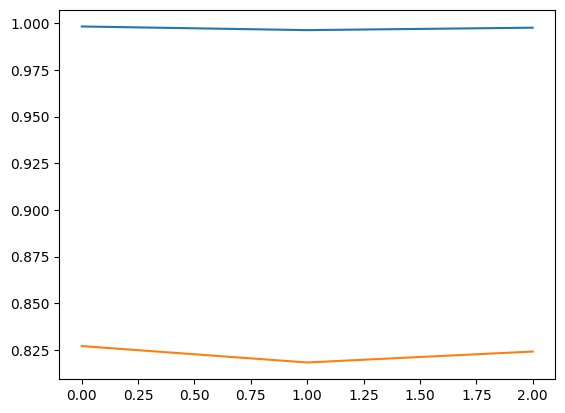

In [58]:
plt.plot(history.history['accuracy'],label='accuracy') 
plt.plot(history.history['val_accuracy'],label='val_accuracy')

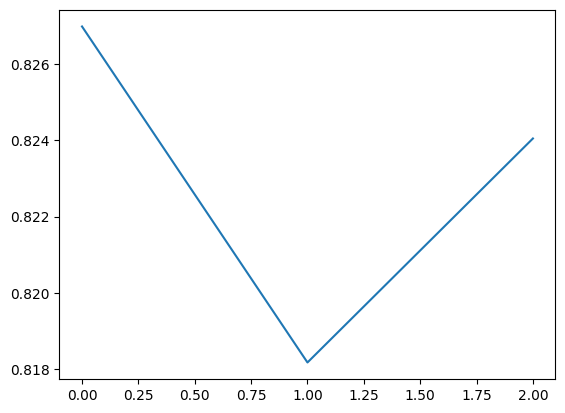

In [59]:
plt.plot(history.history['val_accuracy'],label='val_accuracy')

([<matplotlib.axis.XTick at 0x7b82ad4d9820>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

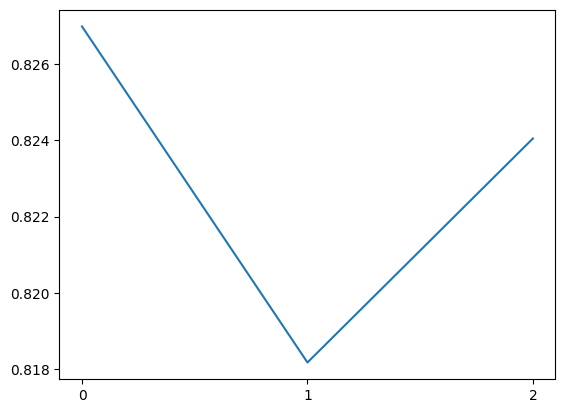

In [60]:

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xticks(np.arange(3))

<font color ='red'><h4><b>Adjusting The Learning Rate</h4></font>

1. what is learning rate (take the analogy how fast you read--of too fast then ideally skimming if slow then slow learning underfit, so the best is medium)
2. Trying different values




In [18]:
# this is the model that we build in the last session we will create a function of it and pass a parameter called learning rate


def make_model(learning_rate=0.01):
    base_model =Xception(weights = 'imagenet',include_top=False,input_shape=(150,150,3))

    base_model.trainable=False
    
    ######################################################################################
    #                       Create Architecture of the model

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs,training=False)

    vectors = keras.layers.GlobalAveragePooling2D() (base)

    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs,outputs)
    
    ######################################################################################

    optimizer = keras.optimizers.Adam(learning_rate =learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    return model


In [24]:
# now we want to iterate over different value of learning rates
scores ={}
for lr in [0.0001,0.001,0.01,0.1]:
    print(f'lr={lr}')
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds,epochs=6,validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()

lr=0.0001
Epoch 1/6
96/96 [==============================] - 146s 1s/step - loss: 1.9633 - accuracy: 0.3566 - val_loss: 1.6118 - val_accuracy: 0.5103
Epoch 2/6
96/96 [==============================] - 123s 1s/step - loss: 1.4106 - accuracy: 0.5525 - val_loss: 1.2526 - val_accuracy: 0.6129
Epoch 3/6
96/96 [==============================] - 132s 1s/step - loss: 1.1584 - accuracy: 0.6327 - val_loss: 1.0632 - val_accuracy: 0.6774
Epoch 4/6
96/96 [==============================] - 123s 1s/step - loss: 1.0142 - accuracy: 0.6760 - val_loss: 0.9547 - val_accuracy: 0.7097
Epoch 5/6
96/96 [==============================] - 133s 1s/step - loss: 0.9173 - accuracy: 0.7057 - val_loss: 0.8758 - val_accuracy: 0.7361
Epoch 6/6
96/96 [==============================] - 154s 2s/step - loss: 0.8457 - accuracy: 0.7298 - val_loss: 0.8243 - val_accuracy: 0.7507


lr=0.001
Epoch 1/6
96/96 [==============================] - 139s 1s/step - loss: 1.0743 - accuracy: 0.6268 - val_loss: 0.6995 - val_accuracy: 0.7830

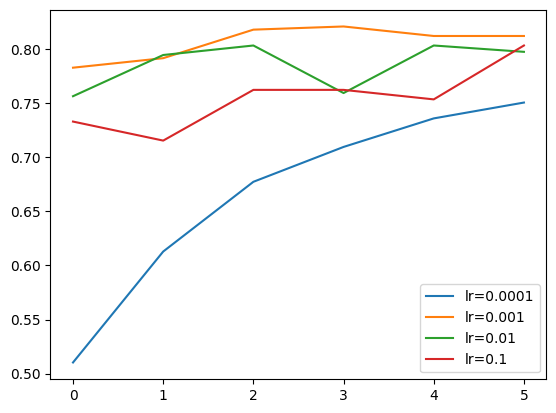

In [25]:
# lets plot this 

for lr,hist in scores.items():
    plt.plot(hist['val_accuracy'],label=f'lr={lr}')
    
plt.legend()

Hence we can say that 0.001 is the best learning rate

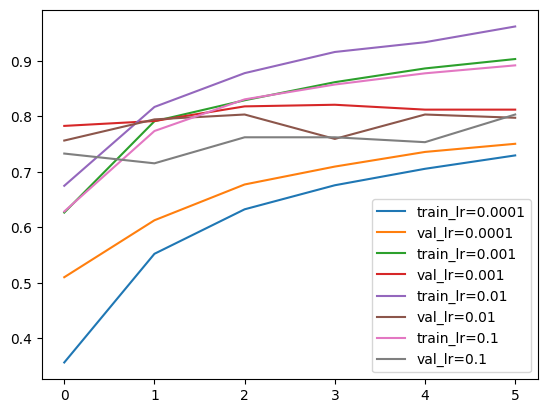

In [26]:
# we can also take a look at the train data as well

for lr,hist in scores.items():
    plt.plot(hist['accuracy'],label=f'train_lr={lr}')
    plt.plot(hist['val_accuracy'],label=f'val_lr={lr}')
    
plt.legend()

so it is good for both train and validation lr = 0.001. so this is the best value of learning rate. For lr = 0.1 there is the case of overfitting since the validation accuray is not that much however the train accuracy goes till 1.

<font color ='red'><h4><b>checkpointing</h4></font>

1. saving the best model only
2. Training a model with callbacks




We want to save our model at the best performance level so the save checkpoint works like its save the result for an epoch using callback once the validation is applied once the iteratoin is done over an epoch, if the value of accuracy for next epoch is better than the last saved than the model at this accuracy is saved else not and this is how we save the model at checkpoints. history is also we get via callbacks only


In [22]:
#we can also directly save the model like 
model.save_weights('model_v1.h5',save_format='h5') # the first parameter is the name of the file and the second is the format that is just a binary format to save the model.

#however the code in the above cell is used when we invoke the modelcheckpoint callback then it will save the model in the template as per created in the above cell.

In [23]:
# there is python way of formatting using the % but also there is format functin and keras uses the format method for model checkpoints. so it passes two arguments where the next argument is .foramt lets see how the file name will look will look like if we pass it the parameters.
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3,val_accuracy =0.84)
# so this is how the file name will look like so 0.2d means this is a digit and we want to have a leading zero

'xception_v1_03_0.840.h5'

In [25]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                              save_best_only=True,
                                              monitor='val_accuracy',
                                              mode='max') 
#in callbacks there is modelcheckpoint and it is used to save the model after each epoch.  The model checkpoint is saved in the h5 format which is the hdf5 format. The h5 format is used to save the model in a file so that we can load the model later and use it for predictions. The model checkpoint is used to save the model with the name xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5. The xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5 is the name of the file that the model checkpoint will save the model in. The {epoch:02d} is the epoch number of the model. The {val_accuracy:.3f} is the validation accuracy of the model. The .3f is used to specify that the validation accuracy should be displayed with 3 decimal places. and 02d the epoch number should in integer format 
# and the we want to save the models that have the best accuracy so we are using the save_best_only=True parameter.
# the monitor parameter is used to specify the metric that the model checkpoint will monitor. 
# the mode parameter is used to specify the mode of the metric that the model checkpoint will monitor which is this case is maximizing it it would have been a loss metric then we would have used mode and min since the losses has to be minimized.
# and this callback is saved in checkpoint variable

In [26]:
#now lets train the model with the model checkpoint callback

model =make_model(learning_rate=0.001)
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint]) # we are using the callbacks parameter to specify the callbacks that we want to use.The callbacks parameter takes list of callbacks that we want to use to train the model

Epoch 1/10
96/96 [==============================] - 156s 2s/step - loss: 1.1026 - accuracy: 0.6343 - val_loss: 0.7174 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 160s 2s/step - loss: 0.6323 - accuracy: 0.7819 - val_loss: 0.6176 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 167s 2s/step - loss: 0.5094 - accuracy: 0.8282 - val_loss: 0.6017 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 170s 2s/step - loss: 0.4215 - accuracy: 0.8579 - val_loss: 0.5683 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 168s 2s/step - loss: 0.3697 - accuracy: 0.8889 - val_loss: 0.5503 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 180s 2s/step - loss: 0.3242 - accuracy: 0.9065 - val_loss: 0.5462 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 165s 2s/step - loss: 0.2870 - accuracy: 0.9214 - val_loss: 0.5415 - val_accuracy: 0.8006
Epoch 8/10
96

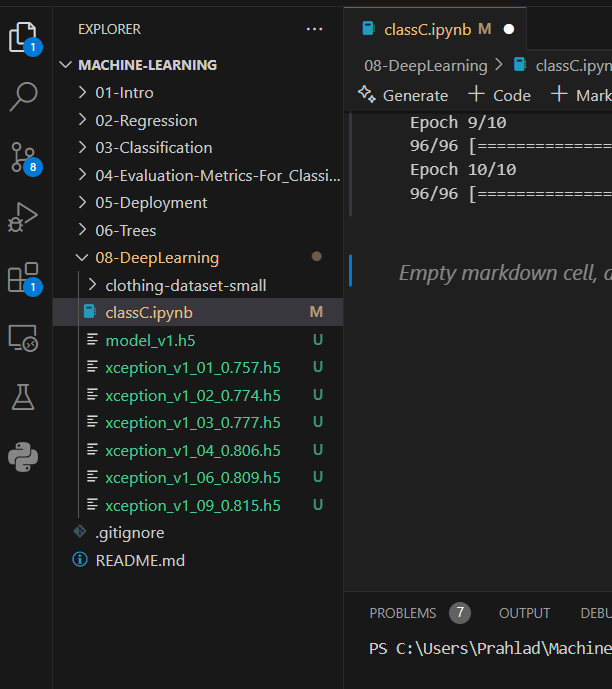<br><br>

This is how the models are saved . as you can see that 5th epoch one is not saved similarly after 6th 7,8 are not saved so we can say that 6th one is the one or the 9th one is the best one but we have to also see the overfitting criteria. <br>

from this lise we can delte all and just keep the best ones for now iam keeping only the 6th one and the 9th one

From this session we have got the best model with accuracy of approx. 81%. and this is the v1 in the next session we will add more dense layer and will create the <font color = 'orange'>v2</font>

<font color ='red'><h4><b>Adding more layer</h4></font>

1. Adding one innder dense layer
2. Experimenting with different sizes of the inner layer


In [28]:
# in our next version we will try to add one more version and then we will see if the model is more accurate

#lets copy the make mode function and add the size of the inner layer as a parameter also we are not using the activation function in the dense layer likesoftmax we are directly using the logits. so for the inner layer as well we need an activation since in neural network each layer should have some transformation in order to achieve better performance.

###########################################  Activation Function  ###############################################################
# there are bunch of different activation functions like sigmoid and softmax that are used for output layers but there are some that are used for intermediate layers like Relu, tanh, leaky relu, etc. the relu is like if the value is smaller than 0 then it gives output as 0 else it gives the values itself.

def make_model(learning_rate=0.01,size_inner =100):
    base_model =Xception(weights = 'imagenet',include_top=False,input_shape=(150,150,3))

    base_model.trainable=False
    
    ######################################################################################
    #                       Create Architecture of the model

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs,training=False)

    vectors = keras.layers.GlobalAveragePooling2D() (base)
    
    inner = keras.layers.Dense(size_inner,activation='relu')(vectors)                                        ##Now this takes in the vector representation as input and the output takes in the input that is outputted from the inner layer and the output of the inner layer will be of dimension 32x100 and that will be the input to the dense layer.

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs,outputs)
    
    ######################################################################################

    optimizer = keras.optimizers.Adam(learning_rate =learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    return model


In [29]:
# now lets find out what is the best size of the inner layer by iterating over values


scores ={}
for size in [10,100,1000]:
    print(f'size-inner={size}')
    model = make_model(learning_rate=0.001,size_inner=size)
    history = model.fit(train_ds,epochs=6,validation_data=val_ds)
    scores[size] = history.history
    print()
    print()


size-inner=10
Epoch 1/6
96/96 [==============================] - 96s 973ms/step - loss: 1.4061 - accuracy: 0.5401 - val_loss: 1.0320 - val_accuracy: 0.6598
Epoch 2/6
96/96 [==============================] - 103s 1s/step - loss: 0.8897 - accuracy: 0.7080 - val_loss: 0.7928 - val_accuracy: 0.7419
Epoch 3/6
96/96 [==============================] - 104s 1s/step - loss: 0.6583 - accuracy: 0.7865 - val_loss: 0.6797 - val_accuracy: 0.7859
Epoch 4/6
96/96 [==============================] - 104s 1s/step - loss: 0.5331 - accuracy: 0.8331 - val_loss: 0.6572 - val_accuracy: 0.7977
Epoch 5/6
96/96 [==============================] - 104s 1s/step - loss: 0.4476 - accuracy: 0.8611 - val_loss: 0.6195 - val_accuracy: 0.7889
Epoch 6/6
96/96 [==============================] - 107s 1s/step - loss: 0.3785 - accuracy: 0.8853 - val_loss: 0.6107 - val_accuracy: 0.7859


size-inner=100
Epoch 1/6
96/96 [==============================] - 110s 1s/step - loss: 0.9763 - accuracy: 0.6649 - val_loss: 0.6502 - val_accu

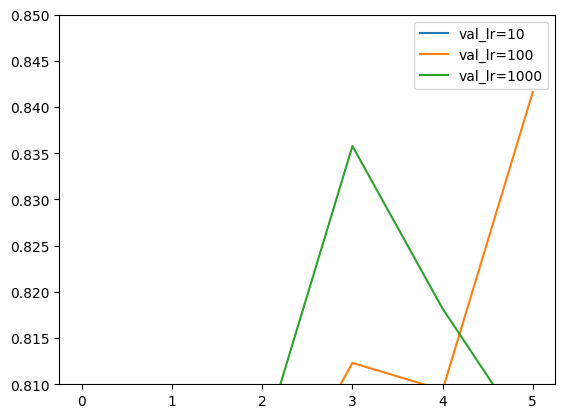

In [34]:

for lr,hist in scores.items():
    
    plt.plot(hist['val_accuracy'],label=f'val_lr={lr}')
    
plt.ylim(0.81,0.850)
plt.legend()


We can see that 100 has the best performance to lets make that the final value of the size

In the next lession we will talk about regularization and dropout in the inner layer and this with the inner layer is the version 2 of the model.
and lets see that if whether with the regularization the performance of the model actually improves.

<font color ='red'><h4><b>Regualrization and Dropout</h4></font>
 
1. Regualrization by freezing a part of the network by using dropout
2. Adding dropout to out model
3. Experimenting with different values

Regualrizatoin is making sure that the model does not overfit on the train dataset, if so then the model performance will to be good for the new data.<br> Lets assume that our model see a image 10 times as we are defining the epoch 10 hence our model will see the training data 10 times and it can see any specific symbol on a tshirt and then can learn that that if that symbol is present then that is a tshirt<br>Now this is wrong as a company of samy symbol might manufacture hats etc as well.<br>
to deal with this lets assume if for each epoch we could hide a part of the image then each time the model will see it as a different item and it will train based on the shape not based on specific logos. <br>
this is not exactly how this happens but we can think of it using this analogy. Hence a drop out parmater is passed in the inner layer which means that in the next epoch it will not change that fraction of the layer as some part of the layer will be disconnected with the input keepin it the same. input is the vector representation of the image so in this case for the first inner layer this analogy fits that we are hiding a part of the image. so in each iteration we hide a different part of the network which is almost same as hiding a part of the input. But note that the ouput leyer is still fully connected it is just that a fracatoin of middle layer part is frozen<br><br>
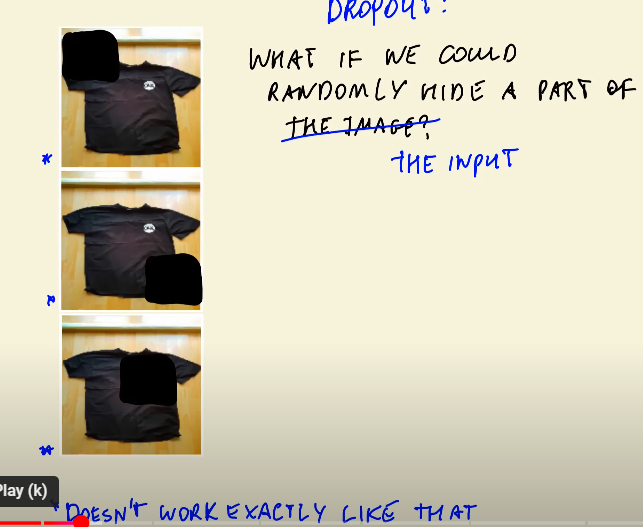<br><br>
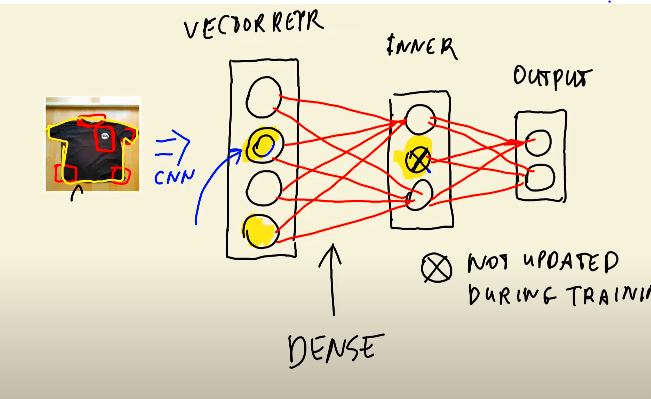<br><br> 
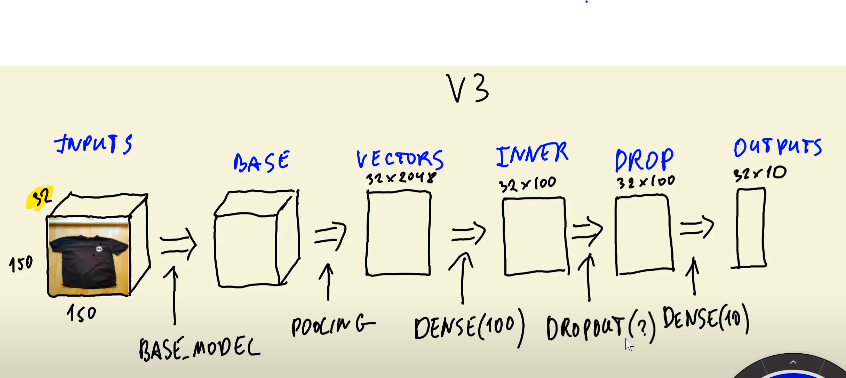


In [35]:
# lets copy our main v2 model and lets add the dropout in that 


def make_model(learning_rate=0.01,size_inner =100,droprate=0.5):
    base_model =Xception(weights = 'imagenet',include_top=False,input_shape=(150,150,3))

    base_model.trainable=False
    
    ######################################################################################
    #                       Create Architecture of the model

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs,training=False)

    vectors = keras.layers.GlobalAveragePooling2D() (base)
    
    inner = keras.layers.Dense(size_inner,activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)                                        #Now this is the droput input to it will be the output of the inner layer and the output of the drop layer will be input to dense layer
                                         
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs,outputs)
    
    ######################################################################################

    optimizer = keras.optimizers.Adam(learning_rate =learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    return model



In [37]:
#now lets find out the best droprate by iterating over the values.
# also since we are freexzing a part of the model hence 10 epochs might not be sufficint so lets make it 30 but due to compute issues I am taking it as 15
learning_rate = 0.001
size = 100
scores={}

for droprate in [0.0,0.2,0.5,0.8]:
    print(f'droprate={droprate}')
    model = make_model(learning_rate=learning_rate,size_inner=size,droprate=droprate)
    history = model.fit(train_ds,epochs=15,validation_data=val_ds)
    scores[droprate] = history.history
    print()
    print()

droprate=0.0
Epoch 1/15
96/96 [==============================] - 102s 1s/step - loss: 0.9702 - accuracy: 0.6675 - val_loss: 0.6215 - val_accuracy: 0.7918
Epoch 2/15
96/96 [==============================] - 107s 1s/step - loss: 0.4984 - accuracy: 0.8292 - val_loss: 0.6057 - val_accuracy: 0.7977
Epoch 3/15
96/96 [==============================] - 102s 1s/step - loss: 0.3532 - accuracy: 0.8823 - val_loss: 0.6269 - val_accuracy: 0.7801
Epoch 4/15
96/96 [==============================] - 107s 1s/step - loss: 0.2477 - accuracy: 0.9211 - val_loss: 0.5355 - val_accuracy: 0.8006
Epoch 5/15
96/96 [==============================] - 113s 1s/step - loss: 0.1835 - accuracy: 0.9492 - val_loss: 0.5582 - val_accuracy: 0.8211
Epoch 6/15
96/96 [==============================] - 108s 1s/step - loss: 0.1200 - accuracy: 0.9759 - val_loss: 0.5614 - val_accuracy: 0.8416
Epoch 7/15
96/96 [==============================] - 116s 1s/step - loss: 0.0780 - accuracy: 0.9892 - val_loss: 0.5709 - val_accuracy: 0.8035


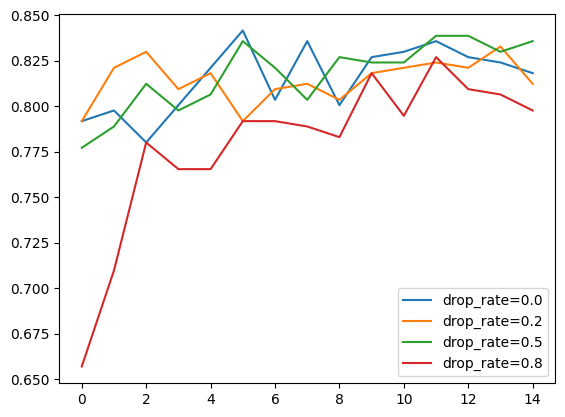

In [38]:
#code for plotting the results
for droprate,hist in scores.items():
    
    plt.plot(hist['val_accuracy'],label=f'drop_rate={droprate}')
    
plt.legend()

I Think the 0.5 one got lucky at a place but after that its values drop significantly also model overfits very early hence we will consider 0.2
<br>
Also the one with 0.0 and also looks similar tothe one that is 0.2 but lets take 0.2 as with regualrizatoin we are still trying to fight overfitting<br><br>
Hecne 0.2 is the final.

In the next session we will do a different approach of regularizatoin, here we freeze a part of the network to not let it overfit but in the next session we will look at ways of generating more data from existing data using image transformatoin function of keras and that will prevent the model from seeing same image over and over again

<font color ='red'><h4><b>Data Augmentatoin</h4></font>
 
1. Different data augmentation
2. Training a model with augmentation
3. How to select data augmentation.

data augmentation refers to the process of increasing the size of the dataset by applying transformations to the images like rotation, zoom, etc. Data augmentation is used to increase the size of the dataset so that the model can learn more about the data and make better predictions. Data augmentation is used to prevent overfitting of the model. Overfitting is a condition where the model learns the training data too well and performs poorly on the validation data.


In [39]:
#we read the data using the ImageDataGenerator class. 
# we can change the values in that to generate the images.

train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
                               rotation_range = 30, #this is the range from -30 to 30
                               width_shift_range = 10.0,
                               height_shift_range = 10.0,
                               shear_range = 10,
                               zoom_range = 0.1,
                               vertical_flip = False)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size = (150,150),
    batch_size = 32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',target_size=(150,150),batch_size=32,shuffle=False) #we use val_gen here instead of train_gen the reason being that we dont want to apply the same augmentation to the validation data since we want to keep the validatoin data same and  the result consistant.

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [40]:
#Now the droprate that has been finalized is 0.2 so lets train the model on the following parmeter.
#Also since the training data is now more hence we need more numbers of epochs to train the model
learning_rate= 0.001
size = 100
droprate = 0.2
model = make_model(learning_rate = learning_rate,
                   size_inner = size,
                   droprate = droprate)


history = model.fit(train_ds,epochs = 50, validation_data=val_ds)



Epoch 1/50
96/96 [==============================] - 113s 1s/step - loss: 1.3156 - accuracy: 0.5639 - val_loss: 0.8169 - val_accuracy: 0.7331
Epoch 2/50
96/96 [==============================] - 113s 1s/step - loss: 0.9302 - accuracy: 0.6858 - val_loss: 0.7039 - val_accuracy: 0.7654
Epoch 3/50
96/96 [==============================] - 114s 1s/step - loss: 0.8129 - accuracy: 0.7207 - val_loss: 0.6479 - val_accuracy: 0.7859
Epoch 4/50
96/96 [==============================] - 120s 1s/step - loss: 0.7502 - accuracy: 0.7389 - val_loss: 0.6286 - val_accuracy: 0.8123
Epoch 5/50
96/96 [==============================] - 128s 1s/step - loss: 0.6698 - accuracy: 0.7699 - val_loss: 0.6381 - val_accuracy: 0.7918
Epoch 6/50
96/96 [==============================] - 125s 1s/step - loss: 0.6503 - accuracy: 0.7816 - val_loss: 0.6141 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 124s 1s/step - loss: 0.5821 - accuracy: 0.7956 - val_loss: 0.6179 - val_accuracy: 0.7918
Epoch 8/50
96

KeyboardInterrupt: 

I stopped the execution since the validation accuracy seems tto oscilate around 80% not really sure why the reason can be that the size is 150x150 so these augmentation does not make sense. and without augmention only the acc was around 84%
in the nesxt session we will train a larger model 299X299 and then we will see if the augmentation make more sense.

<font color ='red'><h4><b>Training a Larger Model</h4></font>
 
Train a 299x299 model

till now all the expetiment that we did we did on smaller models and the reason for that is the smaller model trains 4 times faster. Hence we wanted to iterate quicker and experiment on various parameter and tune them and now we can take a look at the larger model.

In [46]:
#lets remove the augmentaiton lets now in book he keeps the aug but in the sessoin he removes them

#we read the data using the ImageDataGenerator class. 
# we can change the values in that to generate the images.

train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
                               
                               shear_range = 10,
                               zoom_range = 0.1,
                               horizontal_flip = True)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size = (299,299),
    batch_size = 32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',target_size=(299,299),batch_size=32,shuffle=False) #if we would have removed the augmentation then here train_gen

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
# lets change our make _nmodel function and adda parameter for input size.

def make_model(input_size=150,learning_rate=0.001,size_inner=100,droprate=0.5):
    base_model =Xception(weights = 'imagenet',include_top=False,input_shape=(input_size,input_size,3))

    base_model.trainable=False
    
    ######################################################################################
    #                       Create Architecture of the model

    inputs = keras.Input(shape=(input_size,input_size,3))

    base = base_model(inputs,training=False)

    vectors = keras.layers.GlobalAveragePooling2D() (base)
    
    inner = keras.layers.Dense(size_inner,activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)                                        
                                         
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs,outputs)
    
    ######################################################################################

    optimizer = keras.optimizers.Adam(learning_rate =learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    return model


In [48]:
#Lets also save the model using he modelcheckpoint callback this time it as v4
checkpoint = keras.callbacks.ModelCheckpoint('xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
                                                save_best_only=True,
                                                monitor='val_accuracy',
                                                mode='max')

In [49]:
learning_rate= 0.001
size = 100
droprate = 0.2
input_size = 299
model = make_model(input_size = input_size,
                   learning_rate = learning_rate,
                   size_inner = size,
                   droprate = droprate) 


history = model.fit(train_ds,epochs = 50, validation_data=val_ds,callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 478s 5s/step - loss: 0.8139 - accuracy: 0.7187 - val_loss: 0.4445 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 476s 5s/step - loss: 0.4466 - accuracy: 0.8449 - val_loss: 0.4196 - val_accuracy: 0.8475
Epoch 3/50
96/96 [==============================] - 513s 5s/step - loss: 0.3838 - accuracy: 0.8683 - val_loss: 0.3902 - val_accuracy: 0.8563
Epoch 4/50
96/96 [==============================] - 519s 5s/step - loss: 0.3251 - accuracy: 0.8879 - val_loss: 0.3906 - val_accuracy: 0.8710
Epoch 5/50
96/96 [==============================] - 526s 5s/step - loss: 0.2922 - accuracy: 0.8957 - val_loss: 0.3723 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 525s 5s/step - loss: 0.2622 - accuracy: 0.9087 - val_loss: 0.3807 - val_accuracy: 0.8739
Epoch 7/50
96/96 [==============================] - 479s 5s/step - loss: 0.2468 - accuracy: 0.9117 - val_loss: 0.4037 - val_accuracy: 0.8680
Epoch 8/50
96

KeyboardInterrupt: 

#We will take the model where the train accuracy is not too high and the val_accuracy is also good the reason beign that the model is not overfitting and the model is generalizing well.
#so even if the model is saved at various checkpoints but only consider the one that makes sense not just the one that has the highest accuracy.

I stopped the execution since the model started to oscillate in terms of values.

In the next session we will see that how to use the saved best model

<font color ='red'><h4><b>Using the model</h4></font>
 
1. Loading the model
2. evaluating the model
3. Getting predictions

In [51]:
# we can use the load_model method of keras to load the model
model = keras.models.load_model('xception_v4_20_0.889.h5')

In [52]:
#now we will read the test data set in the same way as we read the train and validation data set
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory('./clothing-dataset-small/test',target_size=(299,299),batch_size=32,shuffle=False)

Found 372 images belonging to 10 classes.


In [53]:
# Now we can evaluate it to get the accuracy of the model on the test data set
model.evaluate(test_ds)     #this will return the loss and accuracy of the model on the test data set.
# the below accuracy is good and we can say that the model is not overfitting. but we can try the one at epoch 5 as well.

12/12 [==============================] - 59s 5s/step - loss: 0.2890 - accuracy: 0.8952


[0.2890141010284424, 0.8951612710952759]

In [54]:
model = keras.models.load_model('xception_v4_05_0.874.h5')

In [55]:
model.evaluate(test_ds)
#hence we can use this model as well

12/12 [==============================] - 44s 4s/step - loss: 0.3006 - accuracy: 0.8952


[0.300616592168808, 0.8951612710952759]

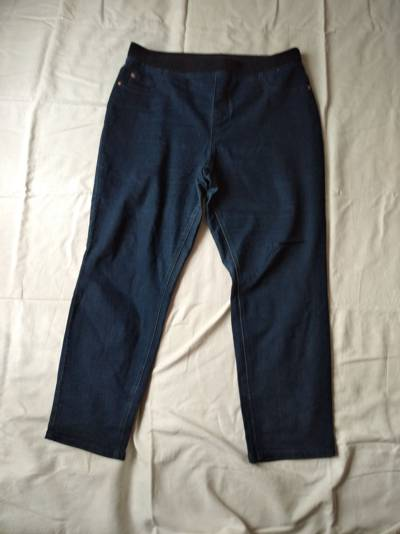

In [56]:
# now lets try to make prediction by lading a image and then preprocessing it and then making the prediction
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

load_img(path)

In [57]:
x=np.array(load_img(path,target_size=(299,299)))

In [58]:
X = preprocess_input(np.array([x]))

In [59]:
X.shape

(1, 299, 299, 3)

In [63]:
pred = model.predict(X)

1/1 [==============================] - 0s 237ms/step


In [62]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [64]:
dict(zip(classes, pred[0]))

{'dress': -2.046595,
 'hat': -2.6936424,
 'longsleeve': -0.51225626,
 'outwear': -0.12485572,
 'pants': 9.322996,
 'shirt': -1.3785112,
 'shoes': -4.93083,
 'shorts': 4.1720047,
 'skirt': -3.194255,
 't-shirt': -3.648989}

Here we can see that the maximum score is against pants hence the prediction is correct and the next is of shorts which is correct.
The reason that this is not probabilities is because we are not using the activation that is softmax in this case, we are directly looking at the raw score and higher the raw score, it belong to that category.

## 8.13 Summary <br>
1. We can use pre-trained models for general image classification
2. Convolutional layers let us turn an image into a vector
3. Dense layers use the vector to make the predictions
4. Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
5. First, train a small model (150x150) before training a big one (299x299)
6. Learning rate - how fast the model trians. Fast learners aren't always best ones
7. We can save the best model using callbacks and checkpointing
8. To avoid overfitting, use dropout and augmentation

## 8.14 Explore more<br>

1. Add more data, e.g. Zalando, etc (ADD LINKS)
2. Albumentations - another way of generating augmentations
3. Use PyTorch or MXNet instead of TensorFlow/Keras
4. In addition to Xception, there are others architectures - try them
5. Other projects:

6. cats vs dogs
7. Hotdog vs not hotdog
8. Category of images